In [111]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [112]:
def haversine_distance(p1,p2):
    lg1 = p1[0]
    lat1 = p1[1]
    lg2 = p2[0]
    lat2 = p2[1]

    R = 6371000
    phi1 = lat1 * pi / 180 #convert to radian
    phi2 = lat2 * pi / 180 #convert to radian
    delta_phi = (lat2 - lat1) * pi / 180
    delta_lambda = (lg2 - lg1) * pi / 180

    a = (sin(delta_phi/2))**2 + cos(phi1) * cos(phi2) * ((sin(delta_lambda/2))**2)
    c = 2 * arctan2(sqrt(a), sqrt(1-a))
    distance = R * c #haversine distance between point1 and point 2 in meters
    return round(distance, 2)

In [113]:
flname="dataset_cluster_warehouse_exp_1.csv"
current_loc = (-6.221509, 106.819269)
df = pd.read_csv(flname)
df


,province_name,city_name,district_name,lat_long,avg_demand_baseline,demand_target,njop_2021_min,njop_2021_max
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,"-6.1548792,106.7204645",153,230,2300.0,14000.0
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,"-6.1639643,106.7506821",387,581,3700.0,35000.0
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,"-6.1461655,106.8106198",114,171,7400.0,35400.0
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,"-6.146188,106.8079118",36,54,4700.0,35800.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,"-6.1915513,106.7481174",771,1157,7000.0,20700.0
...,...,...,...,...,...,...,...,...
63,JAWA BARAT,KOTA DEPOK,BEJI,"-6.3723053,106.7830725",378,832,NaN,NaN
64,JAWA BARAT,KOTA DEPOK,CIMANGGIS,"-6.3723053,106.7830725",231,508,NaN,NaN
65,JAWA BARAT,KOTA DEPOK,CINERE,"-6.3324008,106.7732734",495,1089,NaN,NaN
66,JAWA BARAT,KOTA DEPOK,LIMO,"-6.3663032,106.7621014",264,581,NaN,NaN


In [114]:
# add distancce in dataframe from current loc
l_distance = []
data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)
    l_distance.append(haversine_distance( (lat,long), current_loc ))

df = df.assign(distance = l_distance, lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,153,230,-6.154879,106.720465
1,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,387,581,-6.163964,106.750682
2,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,114,171,-6.146166,106.810620
3,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,36,54,-6.146188,106.807912
4,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,771,1157,-6.191551,106.748117
...,...,...,...,...,...,...
63,KOTA DEPOK,BEJI,378,832,-6.372305,106.783073
64,KOTA DEPOK,CIMANGGIS,231,508,-6.372305,106.783073
65,KOTA DEPOK,CINERE,495,1089,-6.332401,106.773273
66,KOTA DEPOK,LIMO,264,581,-6.366303,106.762101


In [115]:
#Rescaling
scaler = StandardScaler()
dataset_to_scale = dataset[['lat', 'long']]
unscaled_dataset = dataset_to_scale
dataset_scaled = scaler.fit_transform(dataset_to_scale)
unscaled_dataset

,lat,long
0,-6.154879,106.720465
1,-6.163964,106.750682
2,-6.146166,106.810620
3,-6.146188,106.807912
4,-6.191551,106.748117
...,...,...
63,-6.372305,106.783073
64,-6.372305,106.783073
65,-6.332401,106.773273
66,-6.366303,106.762101


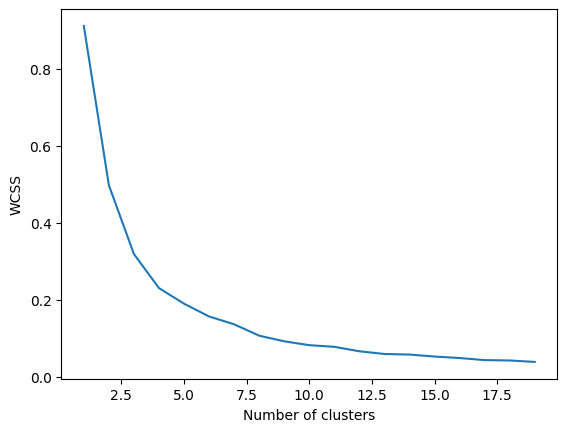

In [116]:
#elbow method

wcss = []
#trying from 1 to 15 cluster to get intertia
crange = 20
for i in range(1, crange):
    kmeans = KMeans(n_clusters=i, init='random', random_state=50)
    kmeans.fit(unscaled_dataset)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, crange), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [117]:
km = KMeans(n_clusters=6, init='random', random_state=50)
km.fit(unscaled_dataset)

KMeans(init='random', n_clusters=6, random_state=50)

In [118]:
clusters = km.cluster_centers_
print(clusters)

[[ -6.18884112 106.80086657]
 [ -6.17872579 106.64836309]
 [ -6.36194362 106.77081757]
 [ -6.27783246 106.87840535]
 [ -6.27952132 106.70809684]
 [ -6.17192113 106.87975596]]


In [119]:
y_km = km.fit_predict(unscaled_dataset)
dataset = dataset.assign(pred=y_km)
dataset[dataset['pred']==0]

,city_name,district_name,avg_demand_baseline,demand_target,lat,long,pred
1,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,387,581,-6.163964,106.750682,0
2,KOTA ADMINISTRASI JAKARTA BARAT,TAMAN SARI,114,171,-6.146166,106.810620,0
3,KOTA ADMINISTRASI JAKARTA BARAT,TAMBORA,36,54,-6.146188,106.807912,0
4,KOTA ADMINISTRASI JAKARTA BARAT,KEBON JERUK,771,1157,-6.191551,106.748117,0
6,KOTA ADMINISTRASI JAKARTA BARAT,PALMERAH,543,815,-6.190994,106.778864,0
10,KOTA ADMINISTRASI JAKARTA SELATAN,KEBAYORAN BARU,303,455,-6.243219,106.783831,0
12,KOTA ADMINISTRASI JAKARTA SELATAN,MAMPANG PRAPATAN,381,572,-6.250285,106.804506,0
16,KOTA ADMINISTRASI JAKARTA SELATAN,SETIABUDI,549,824,-6.221777,106.812879,0
17,KOTA ADMINISTRASI JAKARTA SELATAN,TEBET,426,639,-6.221777,106.812879,0
25,KOTA ADMINISTRASI JAKARTA TIMUR,MATRAMAN,261,470,-6.203830,106.844517,0


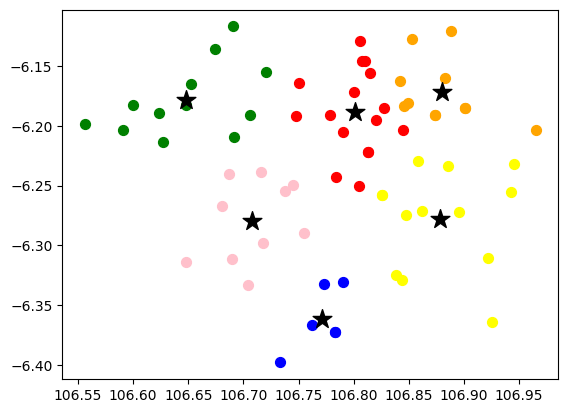

In [128]:
label_a = ("long",1)
label_b = ("lat",0)
plt.scatter(unscaled_dataset[y_km==0][label_a[0]], unscaled_dataset[y_km==0][label_b[0]], s=50, color='red')
plt.scatter(unscaled_dataset[y_km==1][label_a[0]], unscaled_dataset[y_km==1][label_b[0]], s=50, color='green')
plt.scatter(unscaled_dataset[y_km==2][label_a[0]], unscaled_dataset[y_km==2][label_b[0]], s=50, color='blue')
plt.scatter(unscaled_dataset[y_km==3][label_a[0]], unscaled_dataset[y_km==3][label_b[0]], s=50, color='yellow')
plt.scatter(unscaled_dataset[y_km==4][label_a[0]], unscaled_dataset[y_km==4][label_b[0]], s=50, color='pink')
plt.scatter(unscaled_dataset[y_km==5][label_a[0]], unscaled_dataset[y_km==5][label_b[0]], s=50, color='orange')

plt.scatter(clusters[0][label_a[1]], clusters[0][label_b[1]], marker="*", s=200, color="black")
plt.scatter(clusters[1][label_a[1]], clusters[1][label_b[1]], marker="*", s=200, color="black")
plt.scatter(clusters[2][label_a[1]], clusters[2][label_b[1]], marker="*", s=200, color="black")
plt.scatter(clusters[3][label_a[1]], clusters[3][label_b[1]], marker="*", s=200, color="black")
plt.scatter(clusters[4][label_a[1]], clusters[4][label_b[1]], marker="*", s=200, color="black")
plt.scatter(clusters[5][label_a[1]], clusters[5][label_b[1]], marker="*", s=200, color="black")
#
plt.show()
#dataset_scaled[y_km==2,0]